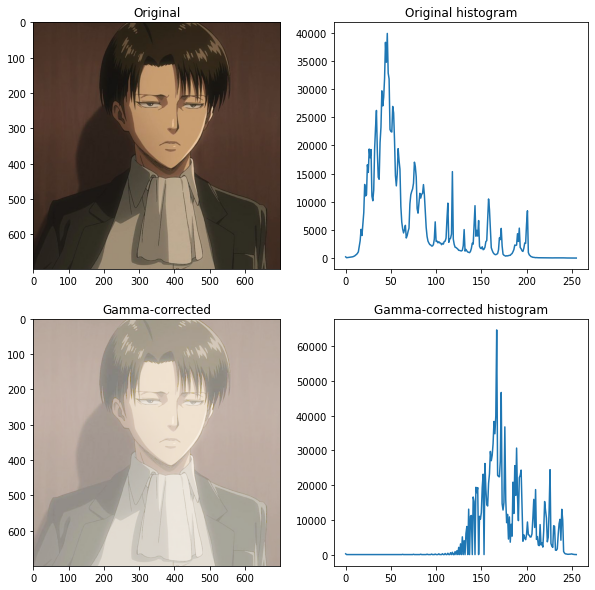

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(img, gamma):
    # Нормалізуємо значення пікселів зображення 
    img_norm = img / 255.0
    # Виконуємо гамма-корекцію
    img_corrected = np.power(img_norm, gamma)
    # Конвертуємо назад
    img_corrected = img_corrected * 255
    img_corrected = img_corrected.astype(np.uint8)
    return img_corrected


img = plt.imread('/content/drive/MyDrive/Photo/2.jpg')


# Вираховуємо гістрограму
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Вираховуємо кумулятивну функцію розподілу
cdf = hist.cumsum()

# Нормалізуємо значення КФР
cdf_normalized = cdf / cdf.max()


gamma = 1/4
gamma_inv = gamma
img_min = img.min()
img_max = img.max()
img_range = img_max - img_min
gamma_cdf = ((bins - img_min) / img_range) ** gamma_inv
gamma_cdf_normalized = gamma_cdf / gamma_cdf.max()
gamma_hist = np.interp(cdf_normalized, gamma_cdf_normalized, bins)

# Виконуємо гамма-корекцію
img_corrected = gamma_correction(img, gamma)

# Вираховуємо гістограму зміненого зображення
hist_corrected, bins_corrected = np.histogram(img_corrected.ravel(), 256, [0, 256])


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].imshow(img)
axs[0][0].set_title('Original')
axs[0][1].plot(hist)
axs[0][1].set_title('Original histogram')

axs[1][0].imshow(img_corrected)
axs[1][0].set_title('Gamma-corrected')
axs[1][1].plot(hist_corrected)
axs[1][1].set_title('Gamma-corrected histogram')

plt.show()


